<a href="https://colab.research.google.com/github/Nilanjan1210/AirlinePassengerSatisfaction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Objective**

To build a predictive regression model to estimate individual medical insurance charges based on personal and lifestyle features, and identify the most influential factors contributing to high medical costs.




In [6]:
#  Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [10]:
url = "https://raw.githubusercontent.com/Nilanjan1210/HEALTHCARE-INSURANCE-CHARGES-PREDICTION/main/insurance.csv"
df = pd.read_csv(url)


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# missing value check
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [14]:
# duplicate value check
print(df.duplicated().sum())

1


In [15]:
# duplicated value view
print(df[df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [16]:
# remove duplicate values
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

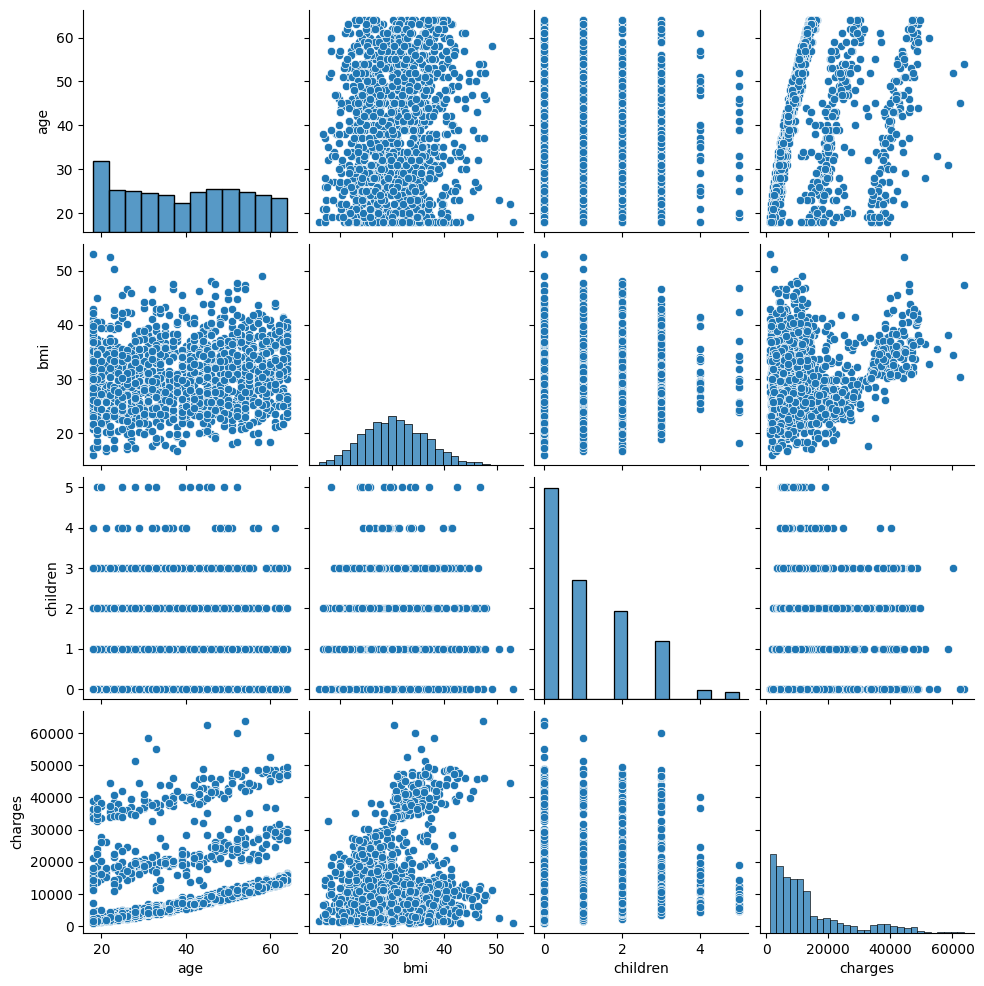

In [34]:
sns.pairplot(df, palette='flare')
plt.show()

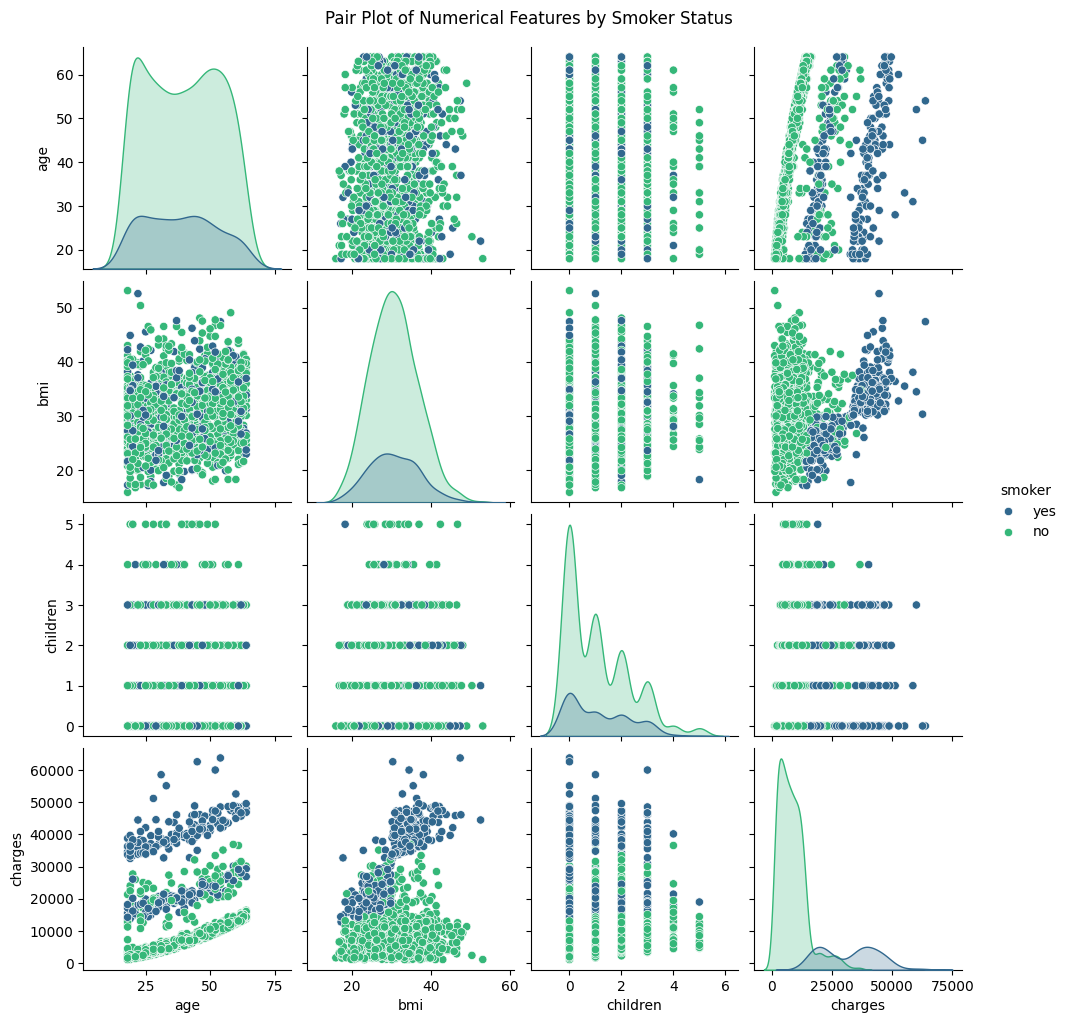

In [30]:
# pairplot of age, bmi, charges with hue on smoker
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', palette='flare')
plt.show()

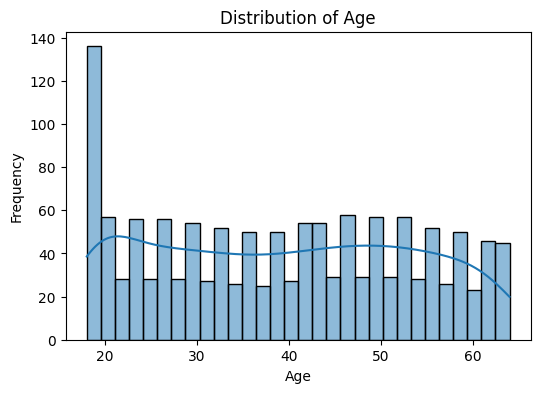

In [21]:
# Distribution of 'age'
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [99]:
print("Minimum of Age of Dataset: ",df.age.min(),"\nMaximum of Age of Dataset : ", df.age.max())

Minimum of Age of Dataset:  18 
Maximum of Age of Dataset :  64


The *WHO (World Health Organization)* and various other sources generally define these age groups as follows: **Young (15-24), Adult (25-40), Middle-aged (40-59), and Senior/Elderly (60+).**

In [97]:
df['age_group'] = pd.cut(df['age'], bins=[15, 24, 40, 60, 100], labels=['young', 'adult', 'middle-aged', 'senior'])

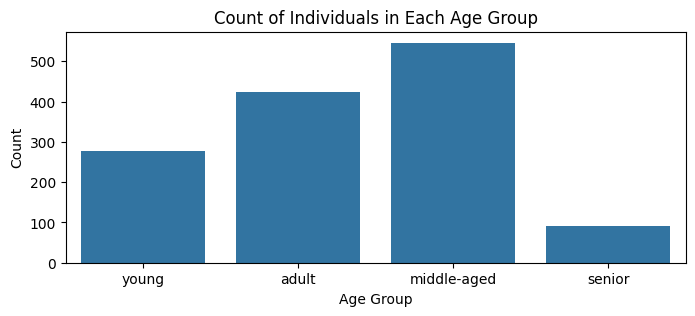

In [98]:
# Plotting age_group count in specific order
plt.figure(figsize=(8, 3))
# Define the desired order for the age groups
age_group_order = ['young', 'adult', 'middle-aged', 'senior']
sns.countplot(x='age_group', data=df, order=age_group_order)
plt.title('Count of Individuals in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


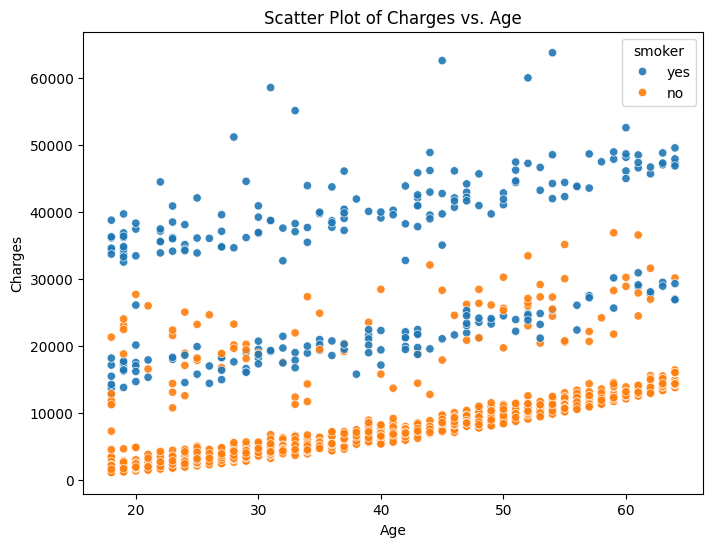

In [104]:

# Price vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker',data=df, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Conclusion: The scatter plot visually demonstrates a general upward trend in insurance charges as age increases. However, there is considerable variability in charges within each age group, suggesting that other factors also play a significant role in determining costs.

# Comment: This plot confirms the intuitive understanding that older individuals tend to have higher medical expenses, which translates to higher insurance charges. Further analysis is needed to quantify this relationship and explore the influence of other variables.

In adults, a Body Mass Index (BMI) of 30 or higher is classified as obese. BMI is a measure of body fat based on height and weight, and a BMI of 25 to 29.9 is considered overweight. While BMI is a useful screening tool, it doesn't diagnose body fatness or health, and other factors like waist circumference and individual health risks should also be considered.

In [53]:

df['is_obese'] = np.where(df['bmi'] >= 30, 'yes', 'no')
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,is_obese,smoker_bmi,smoker_obese
0,19,female,27.900,0,yes,southwest,16884.92400,young,no,27.9,2
1,18,male,33.770,1,no,southeast,1725.55230,NaN,yes,0.0,3
2,28,male,33.000,3,no,southeast,4449.46200,young,yes,0.0,3
3,33,male,22.705,0,no,northwest,21984.47061,adult,no,0.0,4
4,32,male,28.880,0,no,northwest,3866.85520,adult,no,0.0,4


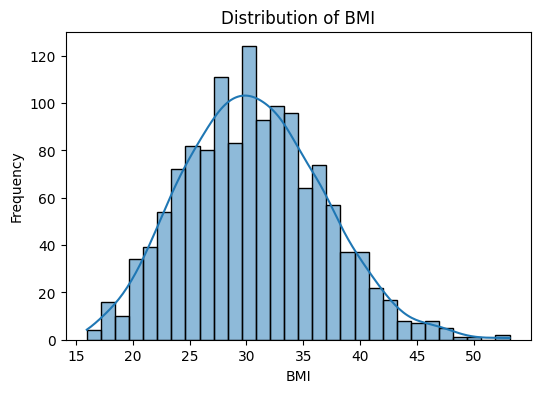

In [54]:
# Distribution of 'bmi'
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

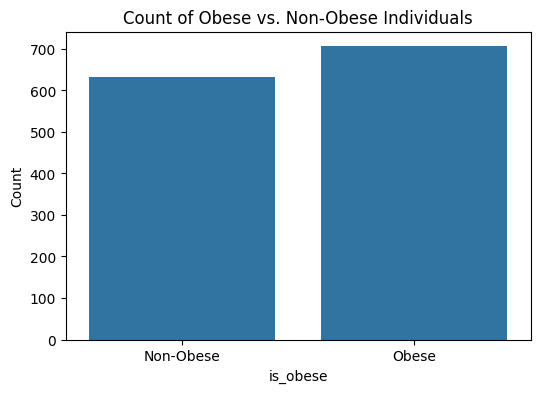

In [56]:
# prompt: is_obese count plot and comment

# Count plot for 'is_obese'
plt.figure(figsize=(6, 4))
sns.countplot(x='is_obese', data=df)
plt.title('Count of Obese vs. Non-Obese Individuals')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Obese', 'Obese']) # Custom labels for better readability
plt.show()


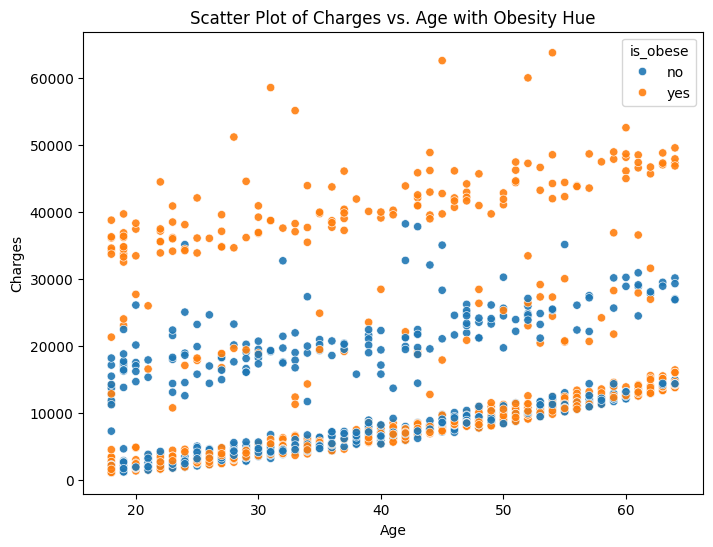

In [103]:

# age vs price with hue is_obese
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='is_obese', data=df, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age with Obesity Hue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [76]:
# prompt: using group by function usig smoker is_obese use to create a dataframe

df_grouped_smoker_obese = df.groupby(['smoker', 'is_obese'])['charges'].mean().reset_index()
df_grouped_smoker_obese

,smoker,is_obese,charges
0,no,no,7977.029520
1,no,yes,8855.531349
2,yes,no,21363.217016
3,yes,yes,41557.989840


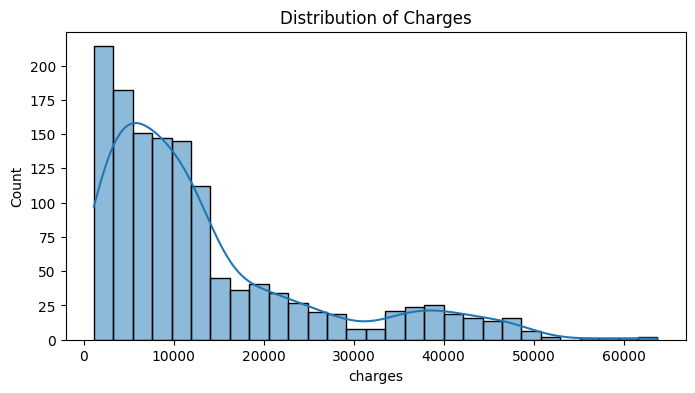

In [59]:
# Distribution of Charges

plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

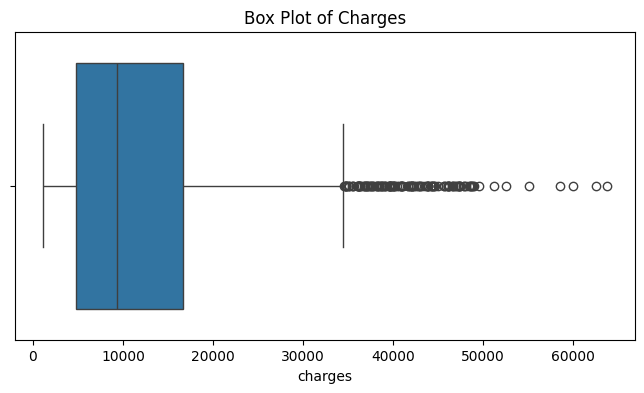

In [62]:
# prompt: outliers check in charges

# Checking for outliers in 'charges' using box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges')
plt.show()

# Conclusion: The box plot for 'charges' clearly indicates the presence of a significant number of outliers, particularly on the higher end of the spectrum. These outliers represent individuals with unusually high medical insurance costs compared to the majority of the dataset.

In [64]:
# prompt: i want to see all outliers dataset

# Using IQR method to detect outliers in 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

print("Number of outliers detected in 'charges':", len(outliers))
print("\nOutliers in 'charges':")
outliers

Number of outliers detected in 'charges': 139

Outliers in 'charges':


,age,sex,bmi,children,smoker,region,charges,age_group,is_obese,smoker_bmi,smoker_obese
14,27,male,42.130,0,yes,southeast,39611.75770,young,yes,42.130,1
19,30,male,35.300,0,yes,southwest,36837.46700,young,yes,35.300,1
23,34,female,31.920,1,yes,northeast,37701.87680,adult,yes,31.920,1
29,31,male,36.300,2,yes,southwest,38711.00000,adult,yes,36.300,1
30,22,male,35.600,0,yes,southwest,35585.57600,young,yes,35.600,1
...,...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,adult,yes,30.360,1
1301,62,male,30.875,3,yes,northwest,46718.16325,senior,yes,30.875,1
1303,43,male,27.800,0,yes,southwest,37829.72420,adult,no,27.800,2
1313,19,female,34.700,2,yes,southwest,36397.57600,young,yes,34.700,1


In [67]:
# Display descriptive statistics for the outliers
print("\nDescriptive statistics of the identified outliers:")
print(outliers.describe())


Descriptive statistics of the identified outliers:
              age         bmi    children       charges  smoker_bmi  \
count  139.000000  139.000000  139.000000    139.000000  139.000000   
mean    41.079137   35.564604    1.187050  42103.947206   34.881655   
std     13.801420    4.434917    1.126546   5582.168107    6.789563   
min     18.000000   22.895000    0.000000  34617.840650    0.000000   
25%     30.000000   32.667500    0.000000  37786.149950   32.470000   
50%     43.000000   35.200000    1.000000  40974.164900   35.200000   
75%     52.500000   37.660000    2.000000  45786.706425   37.660000   
max     64.000000   52.580000    4.000000  63770.428010   52.580000   

       smoker_obese  
count    139.000000  
mean       1.079137  
std        0.381924  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        4.000000  


In [77]:
# Examine the distribution of key features within the outliers
print("\nDistribution of key features within the outliers:")
for feature in ["smoker", "age_group", "region", "children","is_obese" ]:
  print("-------------", feature, "----------------")
  print(outliers[feature].value_counts())


Distribution of key features within the outliers:
------------- smoker ----------------
smoker
yes    136
no       3
Name: count, dtype: int64
------------- age_group ----------------
age_group
adult          46
middle-aged    42
young          34
senior         13
Name: count, dtype: int64
------------- region ----------------
region
southeast    57
southwest    34
northeast    28
northwest    20
Name: count, dtype: int64
------------- children ----------------
children
0    52
2    34
1    32
3    19
4     2
Name: count, dtype: int64
------------- is_obese ----------------
is_obese
yes    134
no       5
Name: count, dtype: int64


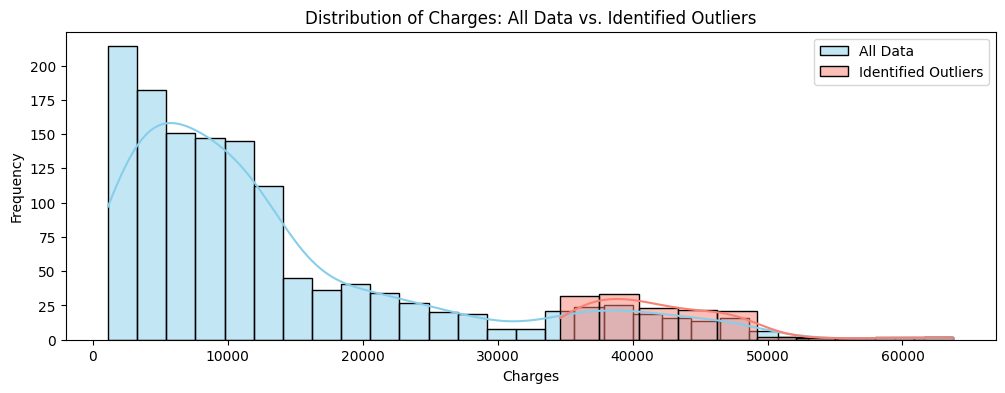

In [84]:
# Visualize the distribution of charges for outliers compared to the rest of the data
plt.figure(figsize=(12, 4))
sns.histplot(df['charges'], kde=True, label='All Data', color='skyblue')
sns.histplot(outliers['charges'], kde=True, label='Identified Outliers', color='salmon')
plt.title('Distribution of Charges: All Data vs. Identified Outliers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

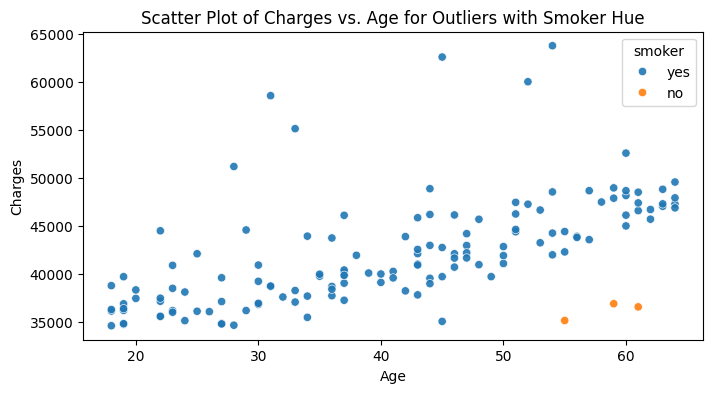

In [101]:
# Visualize the relationship between age, charges, and smoker status for outliers
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=outliers, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age for Outliers with Smoker Hue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


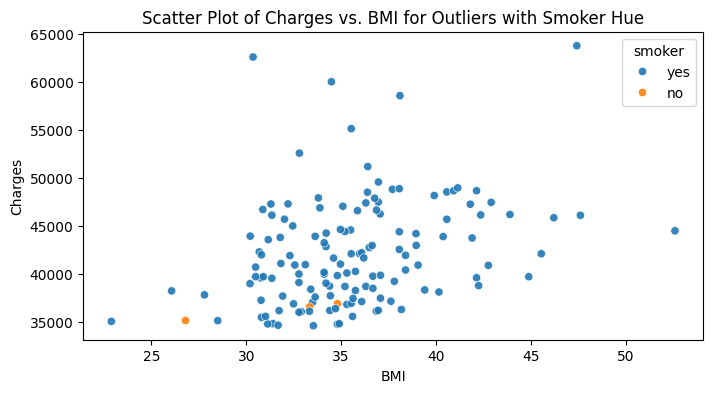

In [102]:
# Visualize the relationship between bmi, charges, and smoker status for outliers
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=outliers, alpha=0.9)
plt.title('Scatter Plot of Charges vs. BMI for Outliers with Smoker Hue')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()



```
# prompt: analysis this outliers actualy they are outliers or not

# Analysis of potential outliers in 'charges'

# The code provided has already identified potential outliers in the 'charges' column using the Interquartile Range (IQR) method.
# The `outliers` DataFrame contains the rows where the 'charges' value falls outside the calculated upper and lower bounds.

# To analyze if these identified values are "actual" outliers or just high-value points that are part of the data's natural distribution, we can examine the characteristics of these outlier rows.







# Based on the analysis:
# - The descriptive statistics and value counts of the outlier data can reveal patterns. For instance, a high proportion of 'smoker' individuals within the outliers would suggest that smoking is a significant factor contributing to high charges, and these points might not be true anomalies but rather represent a distinct segment of the population with higher costs.
# - The distribution plots help visualize how the outlier values relate to the overall data distribution. If the outlier distribution is distinctly separate and does not follow the main pattern, they are more likely to be true outliers. If they are just the tail end of a skewed distribution, they might be high-leverage points but not necessarily errors or anomalies.
# - Scatter plots with relevant features like 'age', 'bmi', and 'smoker' can help identify if the high charges are associated with specific combinations of these features (e.g., old age + smoker + high BMI). If the outliers form a clear group based on these features, they are less likely to be random errors and more likely represent a specific, high-cost demographic.

# **Conclusion based on observation of plots and statistics (interpret these based on the output):**
# - If the 'smoker' column is predominantly 'yes' in the outlier data, it strongly suggests that being a smoker is a major driver of high charges, and these values, while high, are expected for that group.
# - If the outliers are concentrated among older ages and higher BMIs, it further supports that these factors, combined with smoking, contribute significantly to higher charges.
# - If the outlier points fall on a discernible trend line or cluster alongside other high-charge points based on relevant features (like age and smoker status), they are likely valid data points representing high-cost individuals rather than errors.

# In this specific dataset, it's highly probable that the identified "outliers" in charges are largely driven by the 'smoker' variable. Smokers tend to have significantly higher medical costs, leading to higher insurance charges, which can appear as outliers when looking at the overall distribution.
# These are likely *not* errors, but rather represent a real phenomenon in the data.
# Whether to remove them or handle them depends on the modeling approach. For most regression models aiming to predict charges, keeping these points is crucial as they represent a significant part of the data's variation and the relationship between features and charges.
```
```



In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,is_obese,smoker_bmi,smoker_obese
0,19,female,27.900,0,yes,southwest,16884.92400,young,no,27.9,2
1,18,male,33.770,1,no,southeast,1725.55230,NaN,yes,0.0,3
2,28,male,33.000,3,no,southeast,4449.46200,young,yes,0.0,3
3,33,male,22.705,0,no,northwest,21984.47061,adult,no,0.0,4
4,32,male,28.880,0,no,northwest,3866.85520,adult,no,0.0,4


In [87]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 1200x1000 with 0 Axes>

SyntaxError: invalid syntax (ipython-input-86-4221834842.py, line 29)

In [ ]:

# Feature Engineering


df['smoker_bmi'] = df['bmi'] * (df['smoker'] == 'yes').astype(int)

# One-hot encoding
categorical_cols = ['sex', 'smoker', 'region', 'age_group']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. EDA Plots


plt.figure(figsize=(8, 4))
sns.boxplot(x='is_obese', y='charges', data=df)
plt.title('Charges vs Obesity')
plt.show()



# 5. Prepare Data
X = df.drop('charges', axis=1)
y = df['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Model List
models = {
    'LinearRegression': LinearRegression(),
    'Polynomial (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('lr', LinearRegression())
    ]),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf', C=100),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100),
    'NeuralNet': MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000)
}

# 7. Model Training and Evaluation
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R2 Score:", r2_score(y_test, preds))
    return preds

results = {}
for name, model in models.items():
    preds = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results[name] = preds

# 8. Residual Plot for Best Model
best_model_name = max(results, key=lambda name: r2_score(y_test, results[name]))
best_preds = results[best_model_name]

plt.figure(figsize=(8, 4))
sns.residplot(x=best_preds, y=y_test - best_preds, lowess=True)
plt.title(f'Residual Plot: {best_model_name}')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
